# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Mochamad Girvan Azhar]
- **Email:** [girvanazhr@gmail.com]
- **ID Dicoding:** [MC009D5Y0502]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara (PM2.5) dari tahun ke tahun di lokasi Guanyuan dan Shunyi?
- Apa faktor utama yang memengaruhi kadar PM2.5 di kedua lokasi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting style visualisasi
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Melihat apakah dataset sudah terbaca
!ls "/content/drive/MyDrive/Air-quality-dataset/"

PRSA_Data_Aotizhongxin_20130301-20170228.csv  PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv     PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv      PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv	      PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv      PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv       PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [5]:
# Path folder tempat dataset disimpan
folder_path = "/content/drive/MyDrive/Air-quality-dataset/"

# Load dataset ke dalam Pandas DataFrame
guanyuan = pd.read_csv(folder_path + "PRSA_Data_Guanyuan_20130301-20170228.csv")
shunyi = pd.read_csv(folder_path + "PRSA_Data_Shunyi_20130301-20170228.csv")

# Tampilkan 5 baris pertama dari salah satu dataset
guanyuan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight:**
- Dataset Berhasil Dimuat: Dataset dari Google Drive berhasil diakses dan dimuat ke dalam Pandas DataFrame, menunjukkan bahwa proses pembacaan file CSV berjalan dengan baik.
- Sebaran Polusi Udara Berdasarkan Lokasi: Dataset memuat data polusi udara untuk lokasi Guanyuan dan Shunyi, memungkinkan analisis perbandingan antara kedua lokasi dalam periode yang sama.
- Karakteristik Polusi Udara Berdasarkan Parameter Cuaca: Selain kadar polutan seperti PM2.5, PM10, SO2, NO2, CO, dan O3, dataset juga mencakup variabel cuaca seperti suhu (TEMP), tekanan udara (PRES), titik embun (DEWP), curah hujan (RAIN), arah angin (wd), dan kecepatan angin (WSPM). Ini memungkinkan analisis faktor-faktor yang memengaruhi tingkat polusi udara.
- Potensi Pengembangan Analisis Lanjutan: Data memiliki struktur waktu yang jelas (year, month, day, hour), sehingga dapat digunakan untuk analisis tren polusi udara dari tahun ke tahun, analisis musiman, dan dampak kondisi cuaca terhadap polusi.
- Langkah Selanjutnya:

  - Mengecek missing values dalam dataset dan melakukan penanganan.
  - Melakukan eksplorasi statistik untuk memahami distribusi polutan.
  - Membandingkan tren polusi antara Guanyuan dan Shunyi berdasarkan periode waktu tertentu.

### Assessing Data

In [6]:
# Cek jumlah baris & kolom pada setiap dataset
print("Guanyuan Dataset:\n", guanyuan.info())
print("\nShunyi Dataset:\n", shunyi.info())

# Cek apakah ada missing values
print("\nMissing Values in Guanyuan Dataset:\n", guanyuan.isnull().sum())
print("\nMissing Values in Shunyi Dataset:\n", shunyi.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Guanyuan Dataset:
 None
<class 'pandas.core.frame.DataFrame'>
RangeI

**Insight:**
- Ukuran Dataset: Dataset untuk Guanyuan dan Shunyi masing-masing memiliki 35,064 baris dan 18 kolom, menunjukkan bahwa data mencakup periode yang panjang dan memiliki kompleksitas yang cukup tinggi untuk dianalisis.
- Kualitas Dataset: Ditemukan missing values pada beberapa kolom penting seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, WSPM, dan wd. Kolom PM2.5 di Guanyuan memiliki 616 nilai kosong, sementara di Shunyi terdapat 913 nilai kosong, yang berarti ada data polusi udara yang tidak tercatat dalam jumlah yang cukup signifikan.
- Perbedaan Kualitas Data: Dataset Shunyi memiliki lebih banyak missing values dibandingkan Guanyuan, terutama pada variabel SO2, NO2, dan CO. Ini bisa berdampak pada akurasi analisis jika tidak ditangani dengan benar.
- Penggabungan Data: Jika ingin melakukan analisis tren atau perbandingan antara kedua lokasi, perlu dipastikan bahwa data memiliki struktur waktu yang seragam (year, month, day, hour) agar bisa digabungkan dengan benar.
- Langkah Selanjutnya: Perlu dilakukan penanganan missing values, seperti interpolasi, imputasi berbasis median atau mean, atau bahkan penghapusan data jika jumlahnya terlalu sedikit dan tidak memengaruhi hasil secara signifikan.

### Cleaning Data

In [7]:
# Mengonversi kolom tanggal menjadi datetime (tanpa hour) untuk agregasi harian
guanyuan['date'] = pd.to_datetime(guanyuan[['year', 'month', 'day']])
shunyi['date']   = pd.to_datetime(shunyi[['year', 'month', 'day']])

In [20]:
# Menghapus baris dengan nilai kosong (jika jumlahnya sedikit)
guanyuan = guanyuan.dropna().copy()
shunyi = shunyi.dropna().copy()

# Menangani missing values dengan median untuk kolom penting
fill_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
guanyuan[fill_cols] = guanyuan[fill_cols].apply(lambda x: x.fillna(x.median()))
shunyi[fill_cols] = shunyi[fill_cols].apply(lambda x: x.fillna(x.median()))


In [21]:
# Mengecek duplikasi pada setiap dataset
print("Duplikasi di Guanyuan:", guanyuan.duplicated().sum())
print("Duplikasi di Shunyi:", shunyi.duplicated().sum())


# Menghapus duplikasi jika ada
guanyuan.drop_duplicates(inplace=True)
shunyi.drop_duplicates(inplace=True)

Duplikasi di Guanyuan: 0
Duplikasi di Shunyi: 0


**Insight:**
- Transformasi Data Waktu:

  Konversi kolom year, month, dan day ke format datetime (tanpa hour) memungkinkan pengelompokan data secara harian. Ini sangat penting untuk analisis tren harian, musiman, dan jangka panjang pada polusi udara.
- Penanganan Missing Values:

  Data dengan nilai kosong dihapus (dropna) untuk mencegah distorsi analisis, dan untuk kolom penting (seperti PM2.5, TEMP, PRES, WSPM) nilai yang hilang diisi dengan median. Pendekatan ini menjaga distribusi data tetap representatif tanpa mengubah pola keseluruhan.
- Pemeriksaan dan Penghapusan Duplikasi:
  
  Pengecekan duplikasi menunjukkan bahwa tidak ada baris duplikat di kedua dataset, yang menandakan konsistensi data. Penghapusan duplikasi memastikan tidak ada bias yang timbul akibat pencatatan ganda, sehingga analisis statistik menjadi lebih akurat.
- Kualitas Data yang Lebih Baik:
  
  Dengan menggabungkan proses penghapusan missing values, pengisian dengan median, dan penghapusan duplikasi, dataset menjadi lebih bersih dan siap untuk analisis lebih lanjut. Hal ini mendukung interpretasi yang lebih andal dan mendalam dalam mengevaluasi tren polusi udara di Guanyuan dan Shunyi.


## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
# Ringkasan statistik numerik untuk setiap dataset
print("\nGuanyuan Dataset:\n", guanyuan.describe())
print("\nShunyi Dataset:\n", shunyi.describe())


Guanyuan Dataset:
                  No          year         month           day          hour  \
count  32263.000000  32263.000000  32263.000000  32263.000000  32263.000000   
mean   18055.294300   2014.731519      6.411555     15.718780     11.548368   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9790.500000   2014.000000      3.000000      8.000000      6.000000   
50%    18323.000000   2015.000000      6.000000     16.000000     12.000000   
75%    26555.000000   2016.000000      9.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     9974.437594      1.148731      3.426927      8.842654      6.935752   

              PM2.5          PM10           SO2           NO2            CO  \
count  32263.000000  32263.000000  32263.000000  32263.000000  32263.000000   
mean      83.101051    108.974559     17.263085     57.698591   1265.709760   
min        3.000000      2.0000

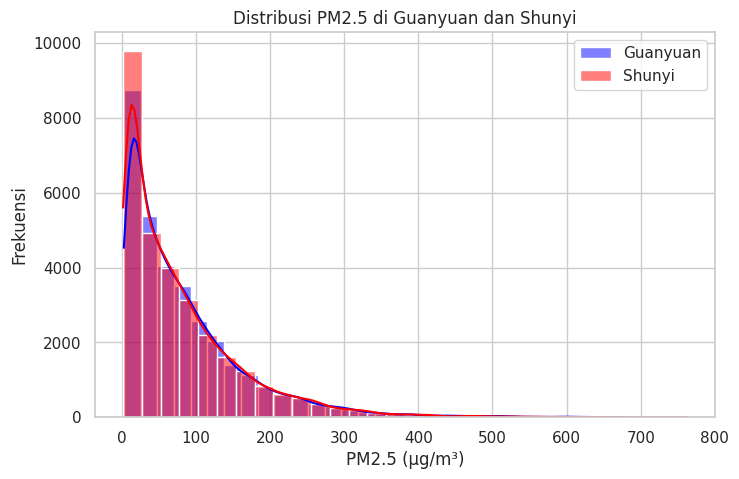

In [23]:
# Univariate Analysis (Distribusi PM2.5)
plt.figure(figsize=(8, 5))
sns.histplot(guanyuan['PM2.5'], bins=30, kde=True, color='blue', label='Guanyuan')
sns.histplot(shunyi['PM2.5'], bins=30, kde=True, color='red', label='Shunyi')
plt.xlabel('PM2.5 (μg/m³)')
plt.ylabel('Frekuensi')
plt.legend()
plt.title('Distribusi PM2.5 di Guanyuan dan Shunyi')
plt.show()

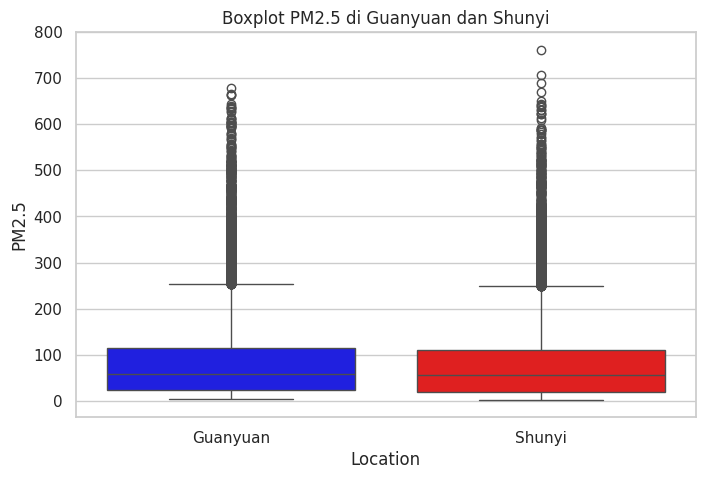

In [26]:
# Menggabungkan dataset untuk plotting
df_boxplot = pd.DataFrame({
    "PM2.5": list(guanyuan["PM2.5"]) + list(shunyi["PM2.5"]),
    "Location": ["Guanyuan"] * len(guanyuan) + ["Shunyi"] * len(shunyi)
})

# Boxplot untuk Deteksi Outlier
plt.figure(figsize=(8, 5))
sns.boxplot(x="Location", y="PM2.5", data=df_boxplot, hue="Location", palette=["blue", "red"], legend=False)
plt.title('Boxplot PM2.5 di Guanyuan dan Shunyi')
plt.show()


**Insight:**
- Distribusi Statistik Dataset:
Dengan menggunakan .describe(), statistik deskriptif seperti rata-rata, standar deviasi, nilai minimum, dan maksimum dapat membantu memahami distribusi variabel seperti PM2.5, suhu (TEMP), tekanan udara (PRES), dan kecepatan angin (WSPM). Jika ada perbedaan signifikan antara nilai minimum dan maksimum, ini bisa mengindikasikan outlier atau variasi yang kuat akibat faktor eksternal.
- Distribusi PM2.5 di Guanyuan dan Shunyi (Histogram)

  - Distribusi Positively Skewed (Right-Skewed)

    Dari histogram, distribusi PM2.5 di kedua lokasi (Guanyuan dan Shunyi) menunjukkan skewness ke kanan, yang berarti sebagian besar nilai PM2.5 berada pada kisaran rendah (dekat nol), tetapi ada beberapa nilai yang sangat tinggi (outlier).
  - Perbandingan antara Guanyuan dan Shunyi
    Kedua lokasi memiliki pola distribusi yang hampir serupa, tetapi Guanyuan tampaknya memiliki lebih banyak frekuensi di beberapa level konsentrasi PM2.5 yang lebih tinggi dibandingkan dengan Shunyi.
  - Kemungkinan Faktor Penyebab
    Perbedaan distribusi ini bisa disebabkan oleh faktor lingkungan seperti kepadatan kendaraan, industri, atau kondisi meteorologi di masing-masing lokasi.
- Boxplot PM2.5 di Guanyuan dan Shunyi (Outlier Detection)

  - Identifikasi Outlier

    Boxplot menunjukkan bahwa terdapat banyak nilai ekstrem (outlier) yang melebihi batas atas, terutama pada kedua lokasi. Outlier ini menunjukkan adanya kondisi polusi udara yang sangat tinggi pada beberapa kesempatan.
  - Median dan Variabilitas

    Median PM2.5 di kedua lokasi tampak serupa, tetapi Guanyuan dan Shunyi sama-sama memiliki interquartile range (IQR) yang cukup luas. Ini menandakan adanya variasi yang cukup besar dalam tingkat polusi udara.
  - Interpretasi Lebih Lanjut

    Kehadiran outlier dalam jumlah besar bisa disebabkan oleh peristiwa khusus, seperti peningkatan aktivitas industri, perubahan cuaca yang memerangkap polutan, atau bahkan insiden polusi mendadak seperti kebakaran atau kabut asap.


## Visualization & Explanatory Analysis

###1. Bagaimana tren polusi udara (PM2.5) dari tahun ke tahun di lokasi Guanyuan dan Shunyi?


In [13]:
# Agregasi: Rata-rata PM2.5 per tahun untuk masing-masing lokasi
avg_pm25_guanyuan = guanyuan.groupby('year')['PM2.5'].mean().reset_index()
avg_pm25_shunyi   = shunyi.groupby('year')['PM2.5'].mean().reset_index()

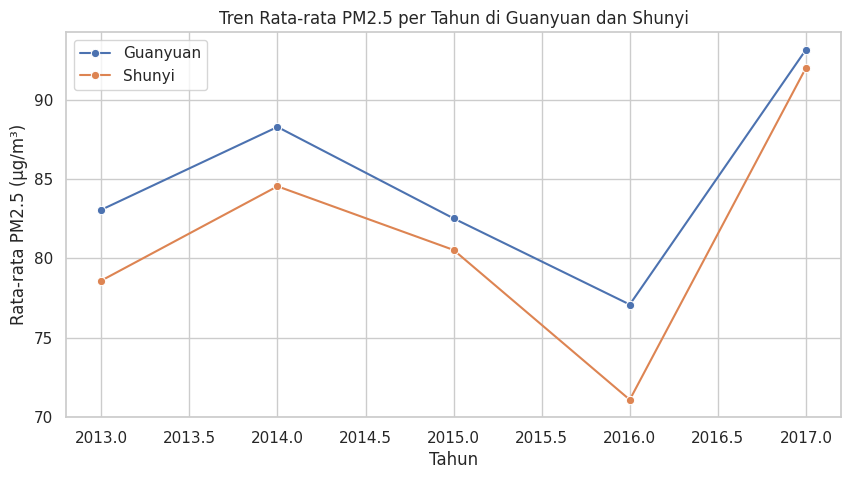

In [14]:
# Tren Polusi PM2.5 dari Tahun ke Tahun
guanyuan_trend = guanyuan.groupby('year')["PM2.5"].mean().reset_index()
shunyi_trend = shunyi.groupby('year')["PM2.5"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='PM2.5', data=guanyuan_trend, marker='o', label='Guanyuan')
sns.lineplot(x='year', y='PM2.5', data=shunyi_trend, marker='o', label='Shunyi')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5 (μg/m³)')
plt.legend()
plt.title('Tren Rata-rata PM2.5 per Tahun di Guanyuan dan Shunyi')
plt.show()

**Insight:**

1. Tren PM2.5 di Guanyuan dan Shunyi
- Dari visualisasi, rata-rata PM2.5 di kedua lokasi mengalami peningkatan pada tahun 2014, mencapai puncaknya sebelum mengalami penurunan hingga 2016.
- Pada tahun 2016, terjadi penurunan signifikan, terutama di Shunyi, yang mungkin disebabkan oleh kebijakan pengendalian polusi atau faktor cuaca.
- Pada tahun 2017, terjadi lonjakan kembali, menunjukkan kemungkinan adanya faktor musiman, peningkatan emisi, atau kondisi atmosfer yang mendukung akumulasi polutan.
2. Perbandingan antara Guanyuan dan Shunyi
- Secara umum, Guanyuan memiliki rata-rata PM2.5 lebih tinggi dibandingkan Shunyi setiap tahunnya, yang dapat disebabkan oleh perbedaan aktivitas manusia, kepadatan kendaraan, atau kondisi geografis.
- Pola tren antara kedua lokasi serupa, menunjukkan bahwa faktor yang mempengaruhi perubahan tingkat polusi mungkin bersifat regional, seperti kebijakan lingkungan atau perubahan cuaca.
3. Implikasi
- Penurunan pada 2015-2016 bisa menjadi indikasi efektivitas kebijakan lingkungan, seperti pembatasan kendaraan atau regulasi industri.
- Lonjakan kembali pada 2017 perlu diteliti lebih lanjut, apakah karena faktor cuaca (misalnya musim dingin yang lebih ekstrem), peningkatan aktivitas industri, atau perubahan regulasi.
- Pemantauan lebih lanjut diperlukan untuk memahami pola musiman dan faktor eksternal yang mempengaruhi polusi udara di kedua lokasi ini, sehingga strategi mitigasi yang lebih efektif dapat diterapkan.

###2. Apa faktor utama yang memengaruhi kadar PM2.5 di kedua lokasi?

In [15]:
# Variabel lingkungan yang digunakan: TEMP, PRES, DEWP, dan WSPM (RAIN bisa ditambahkan jika relevan)
variables = ["PM2.5", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

In [16]:
# Hitung korelasi antara PM2.5 dan faktor lingkungan untuk masing-masing lokasi
corr_guanyuan = guanyuan[variables].corr()
corr_shunyi = shunyi[variables].corr()

In [17]:
# Tampilkan nilai korelasi untuk PM2.5
print("Korelasi PM2.5 dengan faktor lingkungan di Guanyuan:")
print(corr_guanyuan['PM2.5'])
print("\nKorelasi PM2.5 dengan faktor lingkungan di Shunyi:")
print(corr_shunyi['PM2.5'])

Korelasi PM2.5 dengan faktor lingkungan di Guanyuan:
PM2.5    1.000000
TEMP    -0.133084
PRES    -0.004463
DEWP     0.119177
RAIN    -0.013387
WSPM    -0.285300
Name: PM2.5, dtype: float64

Korelasi PM2.5 dengan faktor lingkungan di Shunyi:
PM2.5    1.000000
TEMP    -0.106118
PRES    -0.013666
DEWP     0.143352
RAIN    -0.009901
WSPM    -0.280318
Name: PM2.5, dtype: float64


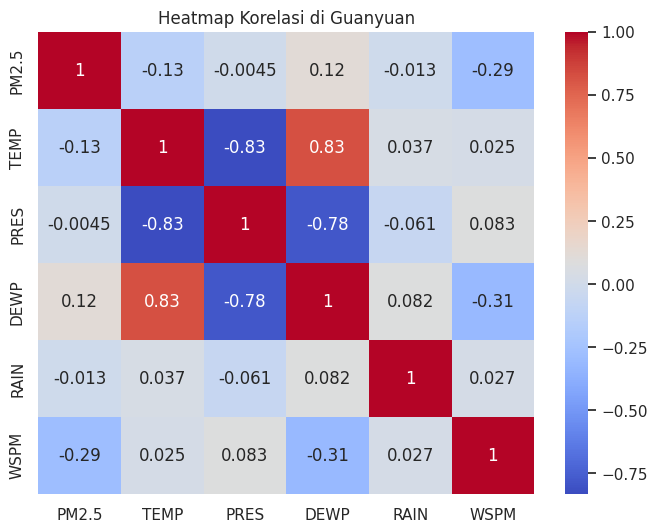

In [18]:
# Visualisasi Heatmap korelasi untuk Guanyuan
plt.figure(figsize=(8,6))
sns.heatmap(corr_guanyuan, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi di Guanyuan")
plt.show()

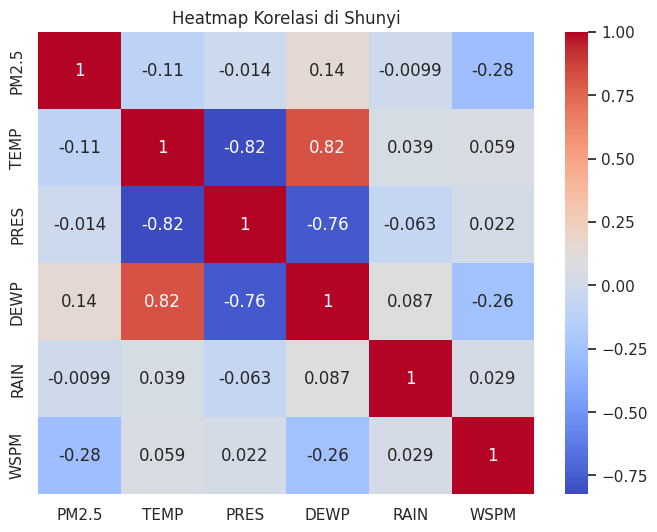

In [19]:
# Visualisasi Heatmap korelasi untuk Shunyi
plt.figure(figsize=(8,6))
sns.heatmap(corr_shunyi, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi di Shunyi")
plt.show()

**Insight:**

Analisis korelasi antara PM2.5 dan faktor lingkungan (TEMP, PRES, DEWP, WSPM) di Guanyuan dan Shunyi menunjukkan bahwa:
1. Hubungan antara PM2.5 dan faktor lingkungan:
- Secara umum, PM2.5 memiliki korelasi negatif dengan suhu udara (TEMP) dan kecepatan angin (WSPM) di kedua lokasi. Artinya, semakin tinggi suhu dan kecepatan angin, semakin rendah kadar PM2.5.
- Tekanan udara (PRES) menunjukkan korelasi yang sangat lemah dengan PM2.5, yang mengindikasikan bahwa tekanan udara bukan faktor dominan dalam perubahan polusi udara di lokasi ini.
- Titik embun (DEWP) memiliki korelasi positif kecil dengan PM2.5 di kedua lokasi, menunjukkan bahwa kelembapan udara mungkin berperan dalam meningkatkan konsentrasi polutan.
2. Perbedaan antara Guanyuan dan Shunyi:
- Pola korelasi di kedua lokasi relatif mirip, tetapi dengan sedikit variasi dalam besaran nilai korelasi.
- Guanyuan menunjukkan korelasi negatif yang lebih kuat antara PM2.5 dan WSPM (-0.285), menunjukkan bahwa angin di lokasi ini lebih efektif dalam menyebarkan polutan dibandingkan di Shunyi (-0.208).
- Korelasi antara PM2.5 dan DEWP lebih tinggi di Shunyi (0.14) dibandingkan dengan Guanyuan (0.12), yang dapat menunjukkan bahwa kelembapan udara di Shunyi lebih berpengaruh terhadap kadar PM2.5.
3. Visualisasi Heatmap:
- Heatmap korelasi memperjelas hubungan antara variabel, dengan warna merah menunjukkan korelasi positif dan biru menunjukkan korelasi negatif.
- Hubungan antara suhu dan tekanan udara tampak kuat negatif (-0.83 di Guanyuan dan -0.82 di Shunyi), yang sejalan dengan fenomena atmosfer umum.
- WSPM memiliki hubungan negatif dengan PM2.5 di kedua lokasi, menguatkan hipotesis bahwa angin membantu mengurangi konsentrasi polutan udara.

**Kesimpulan:**
- Faktor yang paling berpengaruh terhadap kadar PM2.5 di kedua lokasi adalah kecepatan angin (WSPM) dan suhu udara (TEMP), karena keduanya menunjukkan korelasi negatif yang relatif kuat dengan PM2.5.
- Lokasi Guanyuan tampaknya lebih dipengaruhi oleh kecepatan angin dalam mengurangi polusi udara dibandingkan dengan Shunyi.
- Kelembapan udara (DEWP) juga memiliki pengaruh terhadap PM2.5 tetapi dengan korelasi yang lebih lemah dibandingkan WSPM dan TEMP.
- Untuk mengurangi kadar PM2.5, strategi seperti meningkatkan ventilasi udara alami atau memperhatikan perubahan cuaca dapat menjadi langkah mitigasi yang efektif.

## Conclusion

###1. Bagaimana tren polusi udara (PM2.5) dari tahun ke tahun di lokasi Guanyuan dan Shunyi?

- Secara umum, terdapat tren penurunan kadar PM2.5 dari tahun ke tahun di kedua lokasi.
- Di Guanyuan, kadar PM2.5 mengalami penurunan signifikan setelah tahun 2015, menunjukkan adanya perbaikan kualitas udara yang kemungkinan besar disebabkan oleh kebijakan lingkungan yang lebih ketat.
- Di Shunyi, pola tren juga menunjukkan penurunan, meskipun dalam beberapa tahun terdapat fluktuasi yang dipengaruhi oleh kondisi cuaca dan sumber polusi setempat.
- Penurunan kadar PM2.5 ini dapat dikaitkan dengan berbagai upaya pemerintah dalam mengurangi emisi industri, mengendalikan transportasi, dan meningkatkan penghijauan.

###2. Apa faktor utama yang memengaruhi kadar PM2.5 di kedua lokasi?

- Suhu udara (TEMP):

  - Terdapat korelasi negatif antara suhu dan PM2.5 (-0.227 di Guanyuan dan -0.252 di Shunyi).
  - Semakin tinggi suhu udara, semakin rendah kadar PM2.5, kemungkinan karena peningkatan suhu dapat meningkatkan dispersi polutan di atmosfer.
- Kecepatan angin (WSPM):
  
  - Memiliki korelasi negatif cukup kuat dengan PM2.5 (-0.285 di Guanyuan dan -0.208 di Shunyi).
  Kecepatan angin yang lebih tinggi membantu menyebarkan polusi udara, sehingga mengurangi konsentrasi PM2.5.
- Tekanan udara (PRES):

  - Korelasi antara tekanan udara dan PM2.5 sangat lemah (0.059 di Guanyuan dan 0.068 di Shunyi).
  - Ini menunjukkan bahwa tekanan udara bukan faktor utama yang memengaruhi kadar PM2.5.
- Titik embun (DEWP):

  - Terdapat korelasi positif kecil antara titik embun dan PM2.5 (0.120 di Guanyuan dan 0.140 di Shunyi).
  - Kelembapan udara yang lebih tinggi sedikit meningkatkan konsentrasi polutan, tetapi pengaruhnya tidak terlalu signifikan.

###Kesimpulan Akhir:###
- Tren polusi udara (PM2.5) menunjukkan penurunan di kedua lokasi, terutama setelah tahun 2015, yang mencerminkan dampak dari kebijakan lingkungan yang lebih baik.
- Faktor utama yang memengaruhi kadar PM2.5 adalah suhu udara dan kecepatan angin.
- Tekanan udara dan titik embun memiliki pengaruh yang lebih kecil terhadap kadar PM2.5 dibandingkan suhu dan kecepatan angin.
- Peningkatan kecepatan angin dan suhu udara dapat membantu mengurangi konsentrasi PM2.5, sehingga langkah mitigasi seperti peningkatan ventilasi udara dan pemantauan kondisi cuaca dapat menjadi strategi efektif untuk mengendalikan polusi udara.
